## Twitter WeRateDogs- Data Wrangling &Analyzing 

In [4]:
# import required libraries
import pandas as pd
import numpy as np
import os
import requests

## Gathering Data

#### 1.  The WeRateDogs Twitter archive

In [5]:
twitter=pd.read_csv('twitter-archive-enhanced.csv')

In [35]:
twitter.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


#### 2. The tweet image prediction

In [20]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# http response
response=requests.get(url)
with open(url.split('/')[-1],mode='wb')as file:
    file.write(response.content)

In [13]:
pred=pd.read_csv('image-predictions.tsv',sep='\t')

#### 3. Twitter API Query

In [29]:
import tweepy

In [30]:
# Twitter API credentials
consumer_key = 'I6olpe0pDD9nmNK2PjVCk6KRr'
consumer_secret = '023uIPK1U3Ywkn5kjuh6Iy3doRAZoQlJil1H55MrMVH6ZF9HFF'
access_token = '964292099364433921-xPagEgw9vAspDm3KSvSRmbABz9AYBdL'
access_secret = 'CgB3W8QTtP3uPswHXsNWd0bOZzMrQEyZRWqP3hmD3kq3C'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)


In [31]:
# Query data
tweet_ids = list(twitter.tweet_id)
tweet_data={}

for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,wait_on_rate_limit=True)
        tweet_data[str(tweet)]=tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 842892208864923648
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464


In [32]:
import json

with open('tweet_json.txt', 'w') as file:  
    json.dump(tweet_data, file, 
              sort_keys = True,
              ensure_ascii = False)    

In [33]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')


In [36]:
tweet_2 = pd.read_json('tweet_json.txt')


In [38]:
tweet_df.head()
# tweet ID, retweet count, and favorite count

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2529,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,519,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,126,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,304,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,143,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assessing Data

In [ ]:
#### table 1: The WeRateDogs Twitter archive

In [49]:
twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [40]:
twitter.info()
# tweet_id is int type instead of string
# There are missing data in 'expanded_urls' column
# in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id 
# is in float type insteand of string type.
# There are different type of tweets in one dataset, 
# which does not align the tidyness rule that each observation unit forms a table.
# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
twitter.name.value_counts()
# Most of dogs' names are missing
# There are some mispelled names in the name column, like 'a', 'the', 'an'

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Toby           7
Daisy          7
Bailey         7
Buddy          7
Stanley        6
Rusty          6
Milo           6
Koda           6
Jack           6
Leo            6
Scout          6
Jax            6
Oscar          6
Bella          6
Dave           6
Sunny          5
            ... 
Dewey          1
Ulysses        1
Jebberson      1
Stormy         1
Petrick        1
Tebow          1
Philippe       1
Simba          1
Maude          1
Berb           1
Kenzie         1
such           1
Jay            1
Suki           1
Kingsley       1
Dobby          1
Jazzy          1
Dante          1
Brandy         1
Timmy          1
Naphaniel      1
Ralphus        1
Lupe           1
Jessiga        1
Margo          1
Aqua           1
Goose          1
Obi           

In [59]:
twitter[twitter.name==twitter.name.str.lower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
mad              2
not              2
actually         2
getting          2
my               1
all              1
such             1
unacceptable     1
light            1
infuriating      1
this             1
incredibly       1
old              1
his              1
officially       1
space            1
by               1
life             1
Name: name, dtype: int64

In [41]:
twitter[twitter.tweet_id.duplicated()]
# No duplicated tweet id


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [43]:
pred.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
pred.head(10)
# tweet_id is int type instead of object type.
# Capitalize the first letter of p1,p2,p3 columns to make it consistent
# Remove underscores '_' between words in p1,p2,p3 columns 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [47]:
pred.img_num.value_counts()


1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [51]:
tweet_df.info()
# remove unnecessary columns(0 or 1 non-null value): contributors, coordinates, geo, place

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2347 non-null datetime64[ns]
entities                         2347 non-null object
extended_entities                1825 non-null object
favorite_count                   2347 non-null int64
favorited                        2347 non-null int64
geo                              0 non-null float64
id                               2347 non-null int64
id_str                           2347 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [76]:
tweet_df.retweeted.value_counts()
# All tweets's retweeted value is 0

0    2347
Name: retweeted, dtype: int64

#### Quality
##### WeRateDogs Twitter archive
1. tweet_id is an integar instead of a string
2. Missing data in 'expanded_urls' column (can not clean now)
3. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' are floats insteand of string type.
5. 'timestamp' is a string instead of datetime type
7. Erroneous names: 'a', 'the', 'an', 'one', 'very', etc, replace these names with None value
8. Remove unwanted columns
##### Image Prediction Table
1. tweet_id is a int instead of a string
2. Capitalize the first letter of p1,p2,p3 columns to make it consistent
3. Remove underscores '_' between words in p1,p2,p3 columns 
##### Tweet status Table
1. Incomplete columns(0 or 1 non-null value): contributors, coordinates, geo, place, favorited 
2. Remove unnecessary columns that are not needed in later analysis: entities, extended_entities, id_str, truncated, quoted_status, quoted_status_id, quoted_status_id_str, lang, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_user_id, in_reply_to_user_id_str,is_quote_status
3. Rename id to tweet_id to keep consistency with other two tables

#### Tidiness
1. Original tweets and Retweets are mixed in one table. Remove all retweet records and keep only original records
2. Combine all dog stage columns into a single column 
3. Separate timestamp columns into two vaiables 'Date' and 'Time' 
2. Tweet status table' index is tweets' timestamp 
4. Join all three tables using unique key 'tweet_id'

## Cleanning Data

In [115]:
# copy the datasets for cleaning
t1= twitter.copy()
t2 = pred.copy()
t3 = tweet_df.copy()

In [191]:
t3 = tweet_df.copy()

#### DATAFRAME  1
##### Tidiness:
- Original tweets and Retweets are mixed in one table. Remove all retweet records and keep only original records
- Combine all dog stage columns into a single column 
- Separate timestamp columns into two vaiables 'Date' and 'Time'

##### Quality:
- tweet_id is an integar instead of a string
- Missing data in 'expanded_urls' column (can not clean now)
- 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' are floats insteand of string type.
- 'timestamp' is a string instead of datetime type
- Erroneous names: 'a', 'the', 'an', 'one', 'very', etc, replace these names with None value
- Remove unwanted columns

In [116]:
#### Define ####
# Remove all tweet record that have a non-null retweeted_status #
#### Code ####
t1.drop(t1[t1['retweeted_status_id'].notnull()==True].index, inplace=True)

In [117]:
#### Test ####
t1[t1['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [124]:
t1.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [119]:
#### Define ####
# Combine all dog stage columns into a single column #
#### Code ####
t1['stage'] = t1[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
t1['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
t1['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
t1['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
t1['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
t1['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [121]:
t1.drop(['doggo', 'floofer','pupper','puppo'],axis=1,inplace=True)

In [122]:
#### Test ####
t1.stage.value_counts()

None                    1831
pupper                   224
doggo                     75
puppo                     24
doggoNonepupperNone       10
floofer                    9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [125]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    2175 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


In [126]:
#### Define ####
# Split timestamp column into two variables: Date and Time #
#### Code ####
from datetime import datetime,timedelta
t1['timestamp'] = pd.to_datetime(t1['timestamp'])
t1['date'] = t1['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
t1['time'] = t1['timestamp'].apply(lambda time: time.strftime('%H:%M'))


In [128]:
#### Test ####
t1.head(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,07-29-2017,16:00


In [129]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    2175 non-null object
date                     2175 non-null object
time                     2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 237.9+ KB


In [139]:
#### Define ####
# Date and time columns should be datetime type for better analysis #
#### Code ####
t1['date'] = pd.to_datetime(t1['date'])
t1['time'] = pd.to_datetime(t1['time'])
#### Test ####
type(t1['date'].iloc[1])
type(t1['time'].iloc[1])

pandas._libs.tslib.Timestamp

In [130]:
#### Define ####
# Remove unwanted columns #
#### Code ####
t1.drop(['timestamp','in_reply_to_status_id',
               'in_reply_to_user_id',
               'timestamp',
               'source',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'text'], axis=1,inplace=True)

In [131]:
#### Test ####
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


In [132]:
#### Define ####
# Convert tweet_id column from int type to object type #
#### Code ####
t1.tweet_id =t1.tweet_id.astype(str)


In [135]:
#### Test ####
type(t1.tweet_id.iloc[3])


str

In [148]:
#### Define ####
# Identify and remove erroneous dog names #
#### Code ####
pre_name=list(twitter[twitter.name==twitter.name.str.lower()].name)
for item in pre_name:
    t1['name'].replace(item, 'None', inplace=True)

In [149]:
#### Test #### 
t1.name.value_counts()

None            784
Charlie          11
Lucy             11
Cooper           10
Oliver           10
Tucker            9
Penny             9
Sadie             8
Winston           8
Lola              8
Daisy             7
Toby              7
Bailey            6
Oscar             6
Bella             6
Bo                6
Jax               6
Stanley           6
Koda              6
Leo               5
Bentley           5
Dave              5
Milo              5
Scout             5
Louis             5
Rusty             5
Chester           5
Buddy             5
Gary              4
Phil              4
               ... 
Bauer             1
Rodney            1
Carter            1
Steve             1
Craig             1
Ralphus           1
Naphaniel         1
Brandy            1
Mya               1
Charleson         1
Bonaparte         1
Daniel            1
Rumble            1
Wafer             1
Cleopatricia      1
Lilah             1
Luther            1
Klein             1
Simba             1


In [150]:
t1.head()

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time
0,892420643555336193,13,10,Phineas,None,2017-08-01,2018-02-16 16:23:00
1,892177421306343426,13,10,Tilly,None,2017-08-01,2018-02-16 00:17:00
2,891815181378084864,12,10,Archie,None,2017-07-31,2018-02-16 00:18:00
3,891689557279858688,13,10,Darla,None,2017-07-30,2018-02-16 15:58:00
4,891327558926688256,12,10,Franklin,None,2017-07-29,2018-02-16 16:00:00


In [151]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 135.9+ KB


#### DATAFRAME  2

##### Quality
1. tweet_id is a int instead of a string
2. Capitalize the first letter of p1,p2,p3 columns to make it consistent
3. Remove underscores '_' between words in p1,p2,p3 columns 

In [152]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [153]:
#### Define ####
# Convert tweet_id column from int obejects to string objects#
#### Code ####
t2.tweet_id=t2.tweet_id.astype(str)

In [154]:
#### Test ####
type(t2.tweet_id.iloc[2])

str

In [155]:
#### Define ####
# Replace underscores '_' between words in p1,p2,p3 columns with ' '
#### Code ####
t2['p1'] = t2['p1'].str.replace('_', ' ')
t2['p2'] = t2['p2'].str.replace('_', ' ')
t2['p3'] = t2['p3'].str.replace('_', ' ')

In [156]:
#### Test ####
t2.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish terrier,0.487574,True,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [158]:
#### Define ####
# Capitalize the first letter of p1,p2,p3 columns to make it consistent
#### Code ####
t2['p1'] = t2['p1'].str.title()
t2['p2'] = t2['p2'].str.title()
t2['p3'] = t2['p3'].str.title()

In [159]:
### Test ####
list(t2.p1)

['Welsh Springer Spaniel',
 'Redbone',
 'German Shepherd',
 'Rhodesian Ridgeback',
 'Miniature Pinscher',
 'Bernese Mountain Dog',
 'Box Turtle',
 'Chow',
 'Shopping Cart',
 'Miniature Poodle',
 'Golden Retriever',
 'Gordon Setter',
 'Walker Hound',
 'Pug',
 'Bloodhound',
 'Lhasa',
 'English Setter',
 'Hen',
 'Desktop Computer',
 'Italian Greyhound',
 'Maltese Dog',
 'Three-Toed Sloth',
 'Ox',
 'Golden Retriever',
 'Malamute',
 'Guinea Pig',
 'Soft-Coated Wheaten Terrier',
 'Chihuahua',
 'Black-And-Tan Coonhound',
 'Coho',
 'Toy Terrier',
 'Blenheim Spaniel',
 'Pembroke',
 'Llama',
 'Chesapeake Bay Retriever',
 'Chihuahua',
 'Curly-Coated Retriever',
 'Dalmatian',
 'Ibizan Hound',
 'Border Collie',
 'German Shepherd',
 'Labrador Retriever',
 'Miniature Poodle',
 'Seat Belt',
 'Italian Greyhound',
 'Snail',
 'English Setter',
 'Miniature Schnauzer',
 'Maltese Dog',
 'Airedale',
 'Triceratops',
 'Swab',
 'Hay',
 'Hyena',
 'Golden Retriever',
 'Chesapeake Bay Retriever',
 'Jigsaw Puzzle',

#### DATAFRAME  3
##### Quality
- Convert tweet_id column from an int to a string object
- Highly incomplete columns(0 or 1 non-null value): contributors, coordinates, geo, place, favorited 
- Remove unnecessary columns that are not needed in later analysis: entities, extended_entities, id_str, truncated, quoted_status, quoted_status_id, quoted_status_id_str, lang, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_user_id, in_reply_to_user_id_str,is_quote_status
- Rename id to tweet_id to keep consistency with other two tables
##### Tidiness
- Remove the tweets records that are retweets
- Tweet status table' index is tweets' timestamp 
- Join all three tables using unique key 'tweet_id'

In [192]:
#### Define ####
# Remove all tweet record that have a non-null retweeted_status #
#### Code ####
t3.drop(t3[t3['retweeted_status'].notnull()== True].index,inplace=True)

In [193]:
#### Test ####
t3[t3['retweeted_status'].notnull()== True]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user


In [ ]:
#### Define ####
# Convert index into a column and reset the index #
#### Code ####
t3['timestamp'] = t3.index
t3.reset_index(drop=True,inplace=True)

In [195]:
#### Test ####
t3.head(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,timestamp
0,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2529,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,519,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ...",1991-02-08 13:48:08.022790149
1,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ...",1991-02-08 16:08:05.002620928
2,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,126,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ...",1991-02-08 17:16:52.701032449
3,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,304,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,143,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ...",1991-02-08 20:17:06.329800704
4,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ...",1991-02-08 21:40:48.165822465


In [196]:
#### Define ####
# Rename id column to keep consistency #
#### Code ####
t3=t3.rename(columns={"id": "tweet_id"})

In [197]:
#### Define ####
# Convert id column from a int to a string #
#### Code ####
t3.tweet_id=t3.tweet_id.astype('str')

In [198]:
#### Test ####
t3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2175 non-null datetime64[ns]
entities                         2175 non-null object
extended_entities                1749 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null int64
geo                              0 non-null float64
tweet_id                         2175 non-null object
id_str                           2175 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2175 non-null int64
lang                             2175

In [200]:
#### Define ####
# Exclude columns that are not needed or have few non-null object  #


In [199]:
#### Code ####
t3.drop(['contributors','coordinates','possibly_sensitive_appealable','in_reply_to_status_id_str',
        'source','place','retweeted_status','retweeted','created_at','entities','extended_entities',
         'favorited','geo','id_str','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str',
        'in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive',
        'possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str',
        'retweeted','retweeted_status','source','truncated','user']
        , axis=1,inplace=True)

In [201]:
#### Test ####
t3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 5 columns):
favorite_count    2175 non-null int64
tweet_id          2175 non-null object
retweet_count     2175 non-null int64
text              2175 non-null object
timestamp         2175 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 85.0+ KB


In [202]:
t3.head(5)

,favorite_count,tweet_id,retweet_count,text,timestamp
0,2529,666020888022790144,519,Here we have a Japanese Irish Setter. Lost eye...,1991-02-08 13:48:08.022790149
1,130,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...,1991-02-08 16:08:05.002620928
2,126,666033412701032448,46,Here is a very happy pup. Big fan of well-main...,1991-02-08 17:16:52.701032449
3,304,666044226329800704,143,This is a purebred Piers Morgan. Loves to Netf...,1991-02-08 20:17:06.329800704
4,108,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...,1991-02-08 21:40:48.165822465


In [203]:
#### Define ####
# Join all three tables using unique key 'tweet_id' #
#### Code ####
df = pd.merge(t1, t2, on='tweet_id', how='inner')
df = pd.merge(df, t3, on='tweet_id', how='inner')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 22 columns):
tweet_id              1300 non-null object
rating_numerator      1300 non-null int64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
date                  1300 non-null datetime64[ns]
time                  1300 non-null datetime64[ns]
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  130

In [207]:
#### Define ####
# Change format in the 'time' column #
#### Code ####
df['date'] = df['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
df['time'] = df['time'].apply(lambda time: time.strftime('%H:%M'))

In [208]:
#### Test ####
df.head(5)

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text,timestamp
0,891815181378084864,12,10,Archie,None,07-31-2017,00:18,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,Malamute,0.078253,True,Kelpie,0.031379,True,25263,4244,This is Archie. He is a rare Norwegian Pouncin...,1998-04-05 22:26:21.378084864
1,891689557279858688,13,10,Darla,None,07-30-2017,15:58,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,...,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42481,8799,This is Darla. She commenced a snooze mid meal...,1998-04-04 11:32:37.279858688
2,891327558926688256,12,10,Franklin,None,07-29-2017,16:00,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,40658,9578,This is Franklin. He would like you to stop ca...,1998-03-31 06:59:18.926688256
3,891087950875897856,13,10,None,None,07-29-2017,00:08,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,...,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,20396,3178,Here we have a majestic great white breaching ...,1998-03-28 12:25:50.875897856
4,890729181411237888,13,10,None,None,07-28-2017,00:22,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,...,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,66127,19278,When you watch your owner call another dog a g...,1998-03-24 08:46:21.411237888


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 22 columns):
tweet_id              1300 non-null object
rating_numerator      1300 non-null int64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
date                  1300 non-null object
time                  1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null objec

## Storing and Analyzing Data

In [218]:
#### Store the cleaned dataframes to a csv file ####
folder_name = 'cleaned data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
t1.to_csv('cleaned data/twitter_archive_master.csv')
t2.to_csv('cleaned data/image_prediction_master.csv')
t3.to_csv('cleaned data/tweet_query_master.csv')
df.to_csv('cleaned data/final_master.csv')

In [219]:
#### Read the updated dataframes for analysis
df_master=pd.read_csv('cleaned data/final_master.csv')

In [284]:
#### Assessing the final dataset
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 21 columns):
tweet_id              1300 non-null object
rating_numerator      1300 non-null int64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
date                  1300 non-null object
time                  1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null objec

In [222]:
#### Iterate cleaning process
#### Define ####
# Remove 'unnamed: 0' column and convert 'tweet_id' column to string objects #
#### Code ####
df_master.drop(['Unnamed: 0'],axis=1,inplace=True)
df_master.tweet_id = df_master.tweet_id.astype(str)

In [286]:
#### Test ####
type(df_master.tweet_id[1])

str

#### Exploratory Data Analysis 

In [228]:
df_master.drop(['tweet_id'], axis=1).describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03,1.300000e+03,1300.000000,1300.000000
mean,12.843077,10.545385,1.186923,0.587045,1.371542e-01,6.144363e-02,8352.693846,2560.553077
std,51.127955,7.871481,0.540562,0.273533,1.018995e-01,5.200750e-02,11513.769900,4084.448780
min,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,80.000000,14.000000
25%,10.000000,10.000000,1.000000,0.354718,5.440723e-02,1.649338e-02,1736.000000,593.750000
50%,11.000000,10.000000,1.000000,0.579762,1.203825e-01,4.961540e-02,3877.000000,1284.500000
75%,12.000000,10.000000,1.000000,0.836836,1.987905e-01,9.470035e-02,10350.500000,3043.500000
max,1776.000000,170.000000,4.000000,1.000000,4.676780e-01,2.710420e-01,123838.000000,61859.000000


Observations:
- Mean rating for a dog image is 12.843/10 with first quantile in 10/10 and third quantile in 12/10.
- There is an outlier rating of 1776/10 in this dataset
- Mean favorite count is 8352.694 with maximum value of 123838; The median favoriate count is 3877
- Mean retweet count is 2560.553 with maximum value of 61859; The median retweet count is 1284.500
- The neural network algorithm has the highest confident in the first iteration with mean confident of 0.587

#### Which dog get the most favoriates? What is the image/video like?

In [240]:
df_master[df_master['favorite_count']==123838]

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
232,807106840509214720,13,10,Stephan,None,12-09-2016,06:17,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,...,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,123838,61859,This is Stephan. He just wants to help. 13/10 ...


#### Which dog image has the highest retweet count? What is the image/video like?

In [242]:
df_master[df_master['retweet_count']==61859]

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
232,807106840509214720,13,10,Stephan,None,12-09-2016,06:17,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,...,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,123838,61859,This is Stephan. He just wants to help. 13/10 ...


The tweet that has the highest retweet count also has the highest favoriate count. This is a video:
https://twitter.com/dog_rates/status/807106840509214720?lang=en

#### How does the rating ratio change over time?

In [244]:
rate_change=df_master[['date', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [245]:
rate_change['rating'] = rate_change['rating_numerator']/rate_change['rating_denominator']

In [252]:
rate_change.date=pd.to_datetime(rate_change.date)

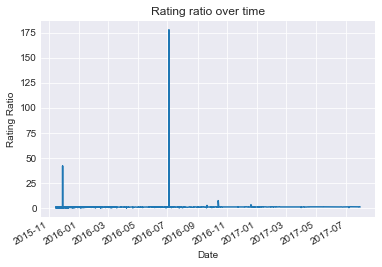

In [266]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.plot(rate_change['date'],rate_change['rating'])
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Rating Ratio')
plt.title('Rating ratio over time')
plt.show()

In [276]:
# From the above plot, we can there are two outliers in the rating ratio: 177.6 and 42.0
rate_change['rating'].sort_values(ascending=False)[0:2]

452     177.6
1102     42.0
Name: rating, dtype: float64

In [281]:
df_master.loc[rate_change[rate_change['rating']==177.6].index]

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
452,749981277374128128,1776,10,Atticus,None,07-04-2016,15:00,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow Tie,...,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,5557,2739,This is Atticus. He's quite simply America af....


In [282]:
df_master.loc[rate_change[rate_change['rating']==42].index]

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
1102,670842764863651840,420,10,None,None,11-29-2015,05:52,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,Microphone,...,False,Accordion,0.094075,False,Drumstick,0.061113,False,25739,9423,After so many requests... here you go.\n\nGood...


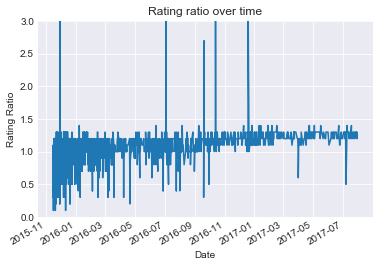

In [290]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.plot(rate_change['date'],rate_change['rating'])
plt.gcf().autofmt_xdate()
plt.ylim(0,3)
plt.xlabel('Date')
plt.ylabel('Rating Ratio')
plt.title('Rating ratio over time')
plt.show()

What is the relationship between the rating, favoriate count and retweet count?

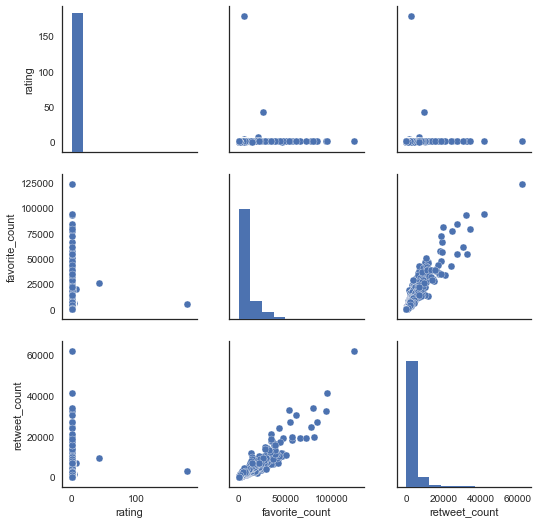

In [300]:
sns.set(style="white")
sns.pairplot(matrix)
plt.show()

Zoom in to the plot of retweet count and favorite count

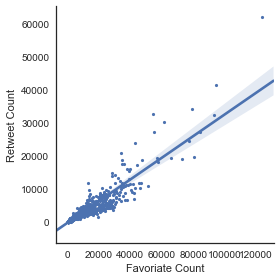

In [309]:
# Show the results of a linear regression within each dataset
%matplotlib inline
g=sns.lmplot(x='favorite_count', y='retweet_count', data=matrix,
           palette="muted", size=4,scatter_kws={"s": 10, "alpha": 1})
g.set_axis_labels("Favoriate Count", "Retweet Count")

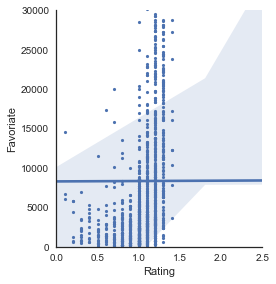

In [320]:
g=sns.lmplot(y='favorite_count', x='rating', data=matrix,
           palette="muted", size=4,scatter_kws={"s": 10, "alpha": 1})
g.set_axis_labels( 'Rating',"Favoriate").set(xlim=(0,2.5),ylim=(0,30000))